In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import gseapy as gp

In [2]:
adata = sc.read_h5ad('/mnt/c/Users/ouyangkang/Downloads/integrate_tmp_3data_withAnno.h5ad')

In [24]:
def kegg_enrichment(gene_list, file_name_prefix):
    # enrichment analysis
    enr = gp.enrich(gene_list,
                    gene_sets="GO_Biological_Process_2023",
                    outdir=None)
    # filtering p value is more than 0.05
    result = enr.res2d[enr.res2d['P-value'] < 0.05]
    # save result
    result.to_csv(f"/mnt/c/Users/ouyangkang/Desktop/{file_name_prefix}_result.csv", index=None)

    return result

In [4]:
# DEGs extraction
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [8]:
ctc_degs = degs[[i for i in degs.columns if '7' in i]]

In [9]:
ctc_degs.head()

,7_names,7_scores,7_pvals,7_pvals_adj,7_logfoldchanges
0,TCF4,11.792844,4.249446e-32,9.712959e-28,6.072473
1,PTPRM,10.430990,1.790137e-25,1.363906e-21,9.109068
2,CDH13,10.252891,1.148561e-24,5.250532e-21,10.427938
3,MALAT1,9.703910,2.901622e-22,8.290297e-19,1.840421
4,DOCK4,9.016103,1.948994e-19,4.049832e-16,5.467091


In [20]:
degs_list = ctc_degs[(ctc_degs['7_pvals_adj'] < 0.05) & (ctc_degs['7_logfoldchanges'] > 1)]['7_names'].tolist()

In [25]:
result = kegg_enrichment(degs_list, 'CTC')

In [26]:
result.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Small GTPase Mediated Signal Tra...,7/118,0.000002,0.000800,0,0,13.715177,181.067762,PREX2;ARHGAP31;PLEKHG1;TRIO;ARHGEF28;RASGRF2;A...
1,GO_Biological_Process_2023,Positive Regulation Of GTPase Activity (GO:004...,9/234,0.000002,0.000800,0,0,8.843596,115.025889,PREX2;DOCK9;RASGRF2;RALGAPA2;ARHGAP29;RAPGEF2;...
2,GO_Biological_Process_2023,Positive Regulation Of Cell Differentiation (G...,9/283,0.000010,0.002493,0,0,7.243992,83.052809,PPP3CA;KITLG;ZEB1;RAPGEF2;TCF4;PRKD1;LAMC1;PLC...
3,GO_Biological_Process_2023,Regulation Of Intracellular Signal Transductio...,9/297,0.000015,0.002747,0,0,6.886938,76.311293,PREX2;ARHGAP31;PLEKHG1;TRIO;VWF;ARHGEF28;RASGR...
4,GO_Biological_Process_2023,Regulation Of Endothelial Cell Migration (GO:0...,5/88,0.000072,0.010321,0,0,12.837803,122.390518,PTPRM;PRKD1;ADAMTS9;SASH1;PTK2


In [27]:
plot_df = result.iloc[[3, 4, 5, 6, 9, 10]]

<Axes: title={'center': 'Different function of DEGs between MGL and MAC'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

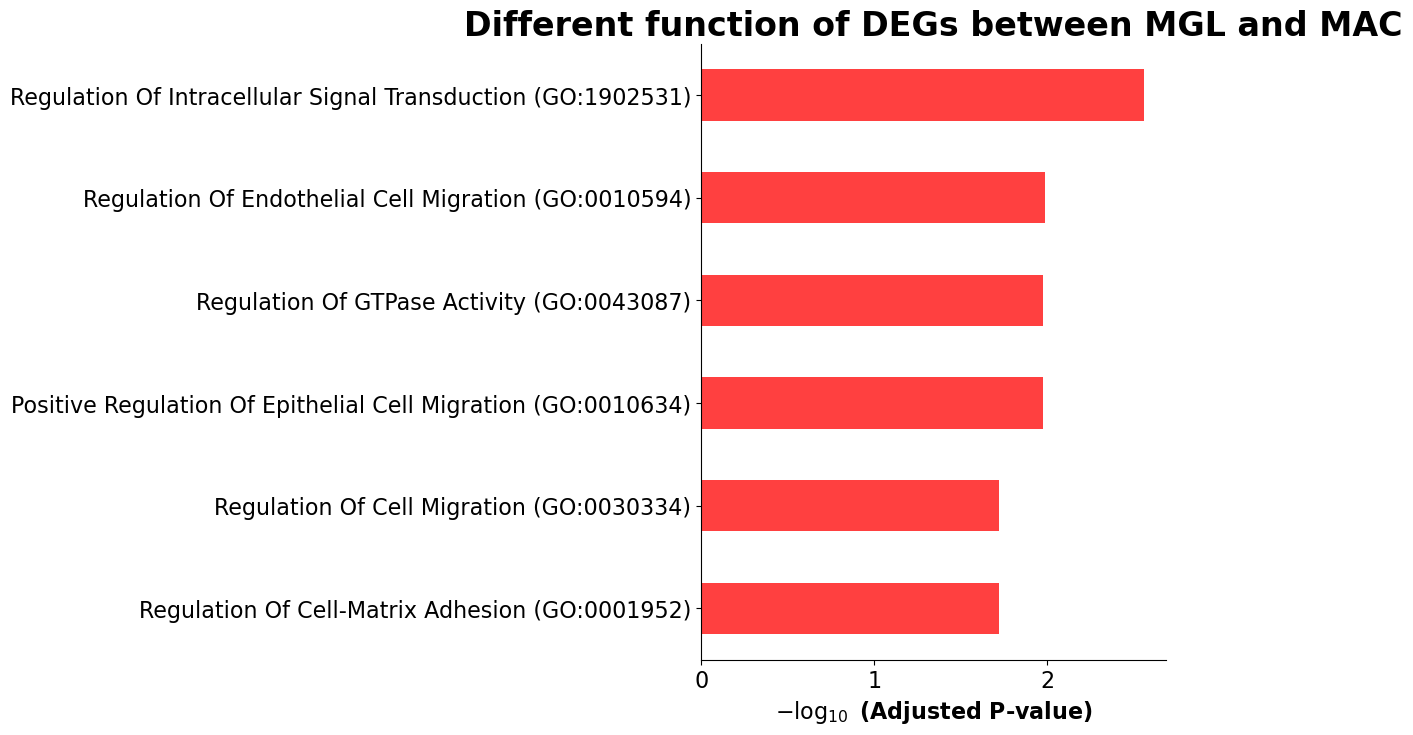

In [30]:
gp.barplot(
    plot_df,
    figsize=(6, 8),
    title="Different function of DEGs between MGL and MAC",
    group="group",
    color=["r"],
    column="Adjusted P-value"
)